In [1]:
from tracker.iou import iou
from tracker.concat_trackers import *
from tracker.find_worms import *
import os 

warnings.simplefilter(action='ignore', category=FutureWarning)

- `p2tracker` 为具体到盘子文件夹的路径

In [31]:
# 写到具体的文件夹名
p2tracker = "./simple_trackers_result/n2_3_30_6_11.04" 
analysis_folder = os.path.split(p2tracker)[-1]

# Part I load subjects and obtain finer trackers

<Axes: xlabel='frame'>

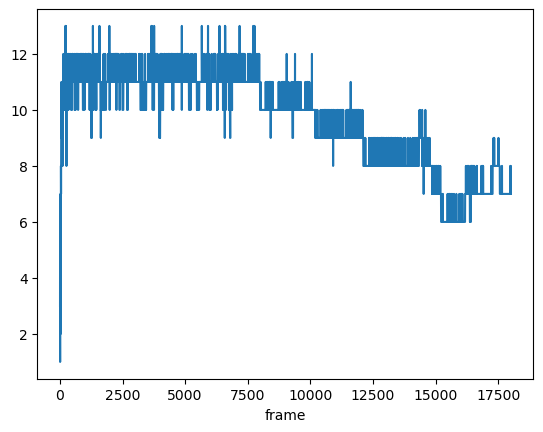

In [32]:
all_trackers, long_dfs, centroid = load_subj('simple_trackers_result', analysis_folder) # load the Petri dish tracker results
new_trackers, new_summarize = trackers2fine(all_trackers, long_dfs)     # convert the trackers to finer trackers
long_dfs.groupby('frame').size().plot() # visualize the number of worms per frame

# PART II Find initial worms
- `find_initial(long_dfs, *, new_summarize)`: **此处的 \* 为盘中虫子数，取决于上面的图像最高点**

In [34]:
all_ini = find_initial(long_dfs, 12, new_summarize)
ini_indx = all_ini.sort_values(by='start_frame').tracker_id.values
print(len(ini_indx))

12


# PART III Find & Diagnosis & Save worms

In [40]:
# find worms based on the initial indices and summarized dataframe
worms = find_worms(ini_indx, new_summarize)
valid_worms = diagnosis_worms_square(worms, new_summarize, centroid, long_dfs, 870, start_frame=600)
print("================= Valid Worms ================")
print(f"Number of valid worms: {len(valid_worms)}")

$[1] all path banned
$[3] all path banned
$[217] all path banned
$[163 186] all path banned
$[0] all path banned
$[325] all path banned
$[307] all path banned
worm 0 start frame > 600
worm 2 start frame > 600
worm 5 start frame > 600
worm 6 start frame > 600
worm 7 end frame < max frame
worm 8 end frame < max frame
worm 9 start frame > 600
worm 10 start frame > 600
worm 11 start frame > 600
================= Valid Worms ================
Number of valid worms: 3
